# Prophet Tain/Test Evaluation

This notebook applies Prophet to forecast air pollutant levels for a selected city using historical data. It performs the following steps for each pollutant:

1. Loads daily time-series data from aqicn file
2. Trains a Prophet model using a train/test split (default split at 2025-01-01)
3. Generates future forecasts and compares them against actual measurements
4. Evaluates performance using Correlation (R), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE)
5. Plots forecast vs. actual
6. Runs cross-validation

In [4]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet.diagnostics import cross_validation, performance_metrics

def load_data(filepath, chunk=None):
    df = pd.read_csv(filepath, skipinitialspace=True)
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    
    # Convert all columns (except date) to numeric
    for col in df.columns:
        if col != "date":
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # Sort by date
    df = df.sort_values(by='date').reset_index(drop=True)

    # Optionally aggregate by week or month
    if chunk in ['week', 'month']:
        df = df.set_index('date')

        if chunk == 'week':
            df = df.resample('W').mean()
        elif chunk == 'month':
            df = df.resample('M').mean()

        df = df.reset_index()

    return df

# Train/Test split and prediction
def train_test_prophet(df, pollutant, split_date='2025-01-01'):
    df_model = df[['date', pollutant]].dropna().rename(columns={'date': 'ds', pollutant: 'y'})
    train = df_model[df_model['ds'] < split_date]
    test = df_model[df_model['ds'] >= split_date]

    model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False, changepoint_prior_scale=0.5)
    model.fit(train)

    future = model.make_future_dataframe(periods=len(test), freq='D')
    forecast = model.predict(future)

    result = forecast[['ds', 'yhat']].merge(df_model, on='ds', how='left')
    return result, test, model

# Performance metrics
def compute_metrics(result_df):
    result_df = result_df.dropna()
    y_true = result_df['y']
    y_pred = result_df['yhat']

    r = np.corrcoef(y_true, y_pred)[0, 1]
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)

    return {'R': round(r, 3), 'RMSE': round(rmse, 2), 'MAE': round(mae, 2)}

# Cross-validation
def prophet_crossval(model, horizon='30 days'):
    df_cv = cross_validation(model, initial='2190 days', period='90 days', horizon=horizon)
    df_p = performance_metrics(df_cv)
    return df_p[['horizon', 'rmse', 'mae', 'mape', 'smape', 'coverage']]

# Visualization
def plot_forecast_vs_actual(result_df, pollutant):
    plt.figure(figsize=(12, 5))
    plt.plot(result_df['ds'], result_df['y'], label='Actual')
    plt.plot(result_df['ds'], result_df['yhat'], label='Forecast')
    plt.title(f"{pollutant.upper()} - Actual vs Forecast")
    plt.xlabel("Date")
    plt.ylabel(pollutant)
    plt.legend()
    plt.grid(True)
    plt.show()


=== PM25 ===


09:37:05 - cmdstanpy - INFO - Chain [1] start processing
09:37:08 - cmdstanpy - INFO - Chain [1] done processing


{'R': 0.536, 'RMSE': 33.03, 'MAE': 25.87}


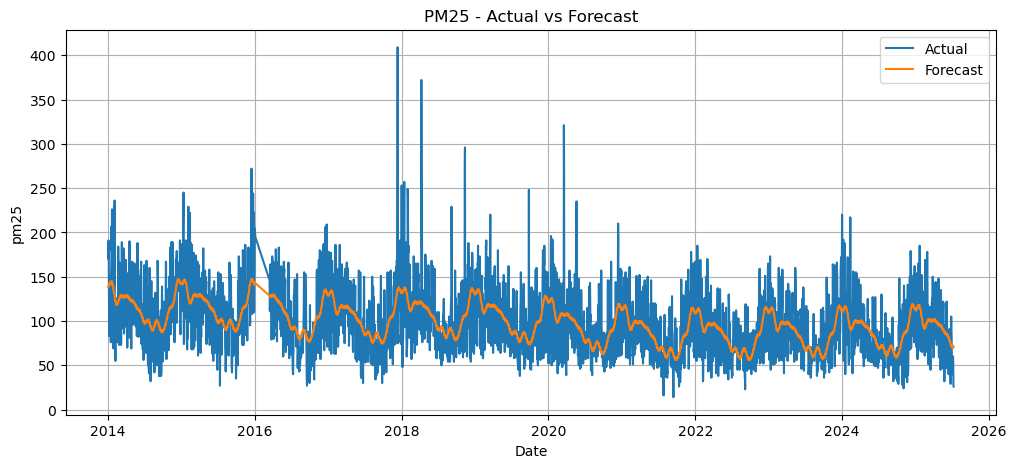

  0%|          | 0/20 [00:00<?, ?it/s]

09:37:09 - cmdstanpy - INFO - Chain [1] start processing
09:37:09 - cmdstanpy - INFO - Chain [1] done processing
09:37:09 - cmdstanpy - INFO - Chain [1] start processing
09:37:09 - cmdstanpy - INFO - Chain [1] done processing
09:37:09 - cmdstanpy - INFO - Chain [1] start processing
09:37:10 - cmdstanpy - INFO - Chain [1] done processing
09:37:10 - cmdstanpy - INFO - Chain [1] start processing
09:37:10 - cmdstanpy - INFO - Chain [1] done processing
09:37:10 - cmdstanpy - INFO - Chain [1] start processing
09:37:10 - cmdstanpy - INFO - Chain [1] done processing
09:37:10 - cmdstanpy - INFO - Chain [1] start processing
09:37:11 - cmdstanpy - INFO - Chain [1] done processing
09:37:11 - cmdstanpy - INFO - Chain [1] start processing
09:37:11 - cmdstanpy - INFO - Chain [1] done processing
09:37:11 - cmdstanpy - INFO - Chain [1] start processing
09:37:12 - cmdstanpy - INFO - Chain [1] done processing
09:37:12 - cmdstanpy - INFO - Chain [1] start processing
09:37:12 - cmdstanpy - INFO - Chain [1]

  horizon       rmse        mae      mape     smape  coverage
0  3 days  26.484655  20.075664  0.238178  0.222162  0.882203
1  4 days  30.003976  23.980955  0.309016  0.272365  0.850000
2  5 days  29.919687  25.039587  0.325760  0.289692  0.864407
3  6 days  31.255289  25.921605  0.346384  0.305130  0.827966
4  7 days  31.069181  25.047712  0.321691  0.292656  0.794068

=== PM10 ===


09:37:19 - cmdstanpy - INFO - Chain [1] done processing


{'R': 0.489, 'RMSE': 18.12, 'MAE': 13.53}


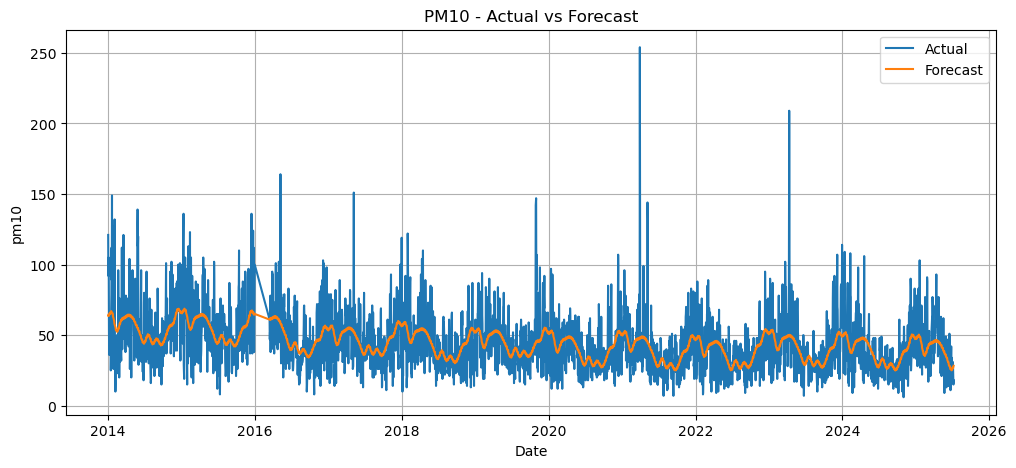

  0%|          | 0/20 [00:00<?, ?it/s]

09:37:20 - cmdstanpy - INFO - Chain [1] start processing
09:37:20 - cmdstanpy - INFO - Chain [1] done processing
09:37:20 - cmdstanpy - INFO - Chain [1] start processing
09:37:20 - cmdstanpy - INFO - Chain [1] done processing
09:37:21 - cmdstanpy - INFO - Chain [1] start processing
09:37:21 - cmdstanpy - INFO - Chain [1] done processing
09:37:21 - cmdstanpy - INFO - Chain [1] start processing
09:37:22 - cmdstanpy - INFO - Chain [1] done processing
09:37:22 - cmdstanpy - INFO - Chain [1] start processing
09:37:23 - cmdstanpy - INFO - Chain [1] done processing
09:37:24 - cmdstanpy - INFO - Chain [1] start processing
09:37:25 - cmdstanpy - INFO - Chain [1] done processing
09:37:25 - cmdstanpy - INFO - Chain [1] start processing
09:37:26 - cmdstanpy - INFO - Chain [1] done processing
09:37:26 - cmdstanpy - INFO - Chain [1] start processing
09:37:26 - cmdstanpy - INFO - Chain [1] done processing
09:37:26 - cmdstanpy - INFO - Chain [1] start processing
09:37:27 - cmdstanpy - INFO - Chain [1]

  horizon       rmse        mae      mape     smape  coverage
0  3 days  16.769002  12.623772  0.315746  0.296116  0.833051
1  4 days  17.279282  13.575720  0.371526  0.331064  0.833051
2  5 days  15.940311  13.201351  0.392427  0.342396  0.881356
3  6 days  16.224825  13.307256  0.445673  0.355282  0.861017
4  7 days  15.813764  12.646545  0.406376  0.335665  0.878814

=== NO2 ===


09:37:40 - cmdstanpy - INFO - Chain [1] done processing


{'R': 0.645, 'RMSE': 7.13, 'MAE': 5.33}


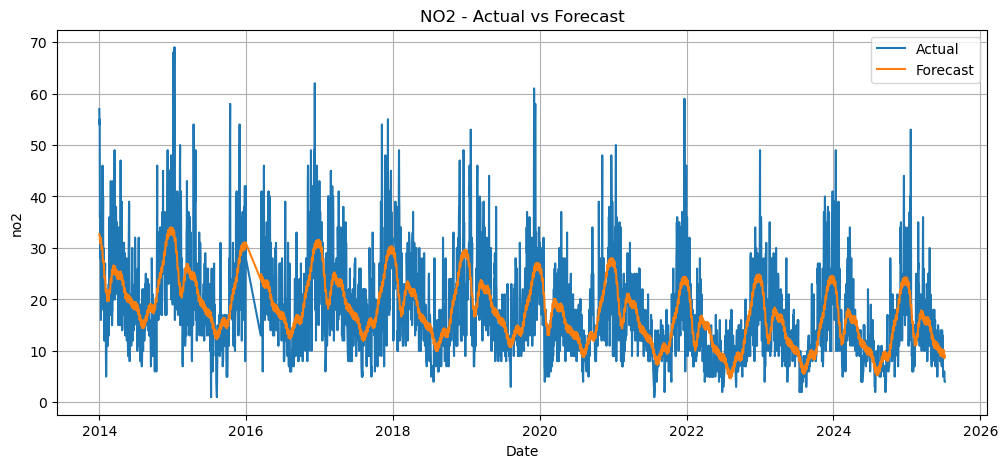

  0%|          | 0/20 [00:00<?, ?it/s]

09:37:42 - cmdstanpy - INFO - Chain [1] start processing
09:37:43 - cmdstanpy - INFO - Chain [1] done processing
09:37:43 - cmdstanpy - INFO - Chain [1] start processing
09:37:43 - cmdstanpy - INFO - Chain [1] done processing
09:37:43 - cmdstanpy - INFO - Chain [1] start processing
09:37:44 - cmdstanpy - INFO - Chain [1] done processing
09:37:44 - cmdstanpy - INFO - Chain [1] start processing
09:37:44 - cmdstanpy - INFO - Chain [1] done processing
09:37:44 - cmdstanpy - INFO - Chain [1] start processing
09:37:44 - cmdstanpy - INFO - Chain [1] done processing
09:37:44 - cmdstanpy - INFO - Chain [1] start processing
09:37:45 - cmdstanpy - INFO - Chain [1] done processing
09:37:45 - cmdstanpy - INFO - Chain [1] start processing
09:37:45 - cmdstanpy - INFO - Chain [1] done processing
09:37:45 - cmdstanpy - INFO - Chain [1] start processing
09:37:46 - cmdstanpy - INFO - Chain [1] done processing
09:37:46 - cmdstanpy - INFO - Chain [1] start processing
09:37:46 - cmdstanpy - INFO - Chain [1]

  horizon      rmse       mae      mape     smape  coverage
0  3 days  7.118375  5.420226  0.328699  0.313893  0.800000
1  4 days  7.102926  5.397483  0.337668  0.313538  0.833898
2  5 days  6.422862  5.047270  0.317751  0.302291  0.864407
3  6 days  7.406854  5.334811  0.343765  0.321786  0.877966
4  7 days  7.743693  5.658515  0.381304  0.347720  0.845763

=== SO2 ===


09:38:03 - cmdstanpy - INFO - Chain [1] done processing


{'R': 0.775, 'RMSE': 2.02, 'MAE': 1.21}


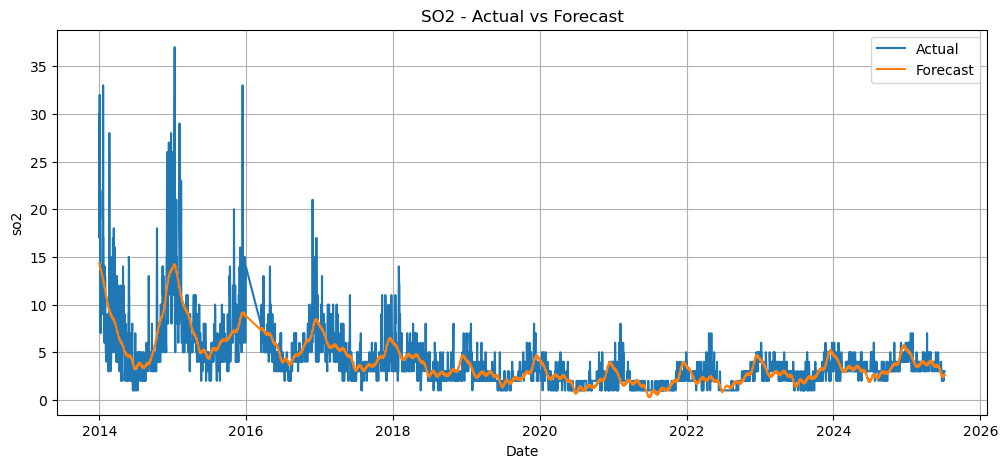

  0%|          | 0/20 [00:00<?, ?it/s]

09:38:04 - cmdstanpy - INFO - Chain [1] start processing
09:38:05 - cmdstanpy - INFO - Chain [1] done processing
09:38:05 - cmdstanpy - INFO - Chain [1] start processing
09:38:06 - cmdstanpy - INFO - Chain [1] done processing
09:38:06 - cmdstanpy - INFO - Chain [1] start processing
09:38:06 - cmdstanpy - INFO - Chain [1] done processing
09:38:07 - cmdstanpy - INFO - Chain [1] start processing
09:38:07 - cmdstanpy - INFO - Chain [1] done processing
09:38:07 - cmdstanpy - INFO - Chain [1] start processing
09:38:08 - cmdstanpy - INFO - Chain [1] done processing
09:38:08 - cmdstanpy - INFO - Chain [1] start processing
09:38:11 - cmdstanpy - INFO - Chain [1] done processing
09:38:11 - cmdstanpy - INFO - Chain [1] start processing
09:38:14 - cmdstanpy - INFO - Chain [1] done processing
09:38:14 - cmdstanpy - INFO - Chain [1] start processing
09:38:15 - cmdstanpy - INFO - Chain [1] done processing
09:38:15 - cmdstanpy - INFO - Chain [1] start processing
09:38:16 - cmdstanpy - INFO - Chain [1]

  horizon      rmse       mae      mape     smape  coverage
0  3 days  1.002140  0.835251  0.472635  0.457643  1.000000
1  4 days  1.021739  0.848447  0.471759  0.477267  1.000000
2  5 days  1.110981  0.894030  0.459962  0.498874  1.000000
3  6 days  1.223154  0.942384  0.505733  0.522926  0.982456
4  7 days  1.228134  0.944238  0.475017  0.515202  0.982456

=== CO ===


09:38:43 - cmdstanpy - INFO - Chain [1] done processing


{'R': 0.506, 'RMSE': 1.92, 'MAE': 1.48}


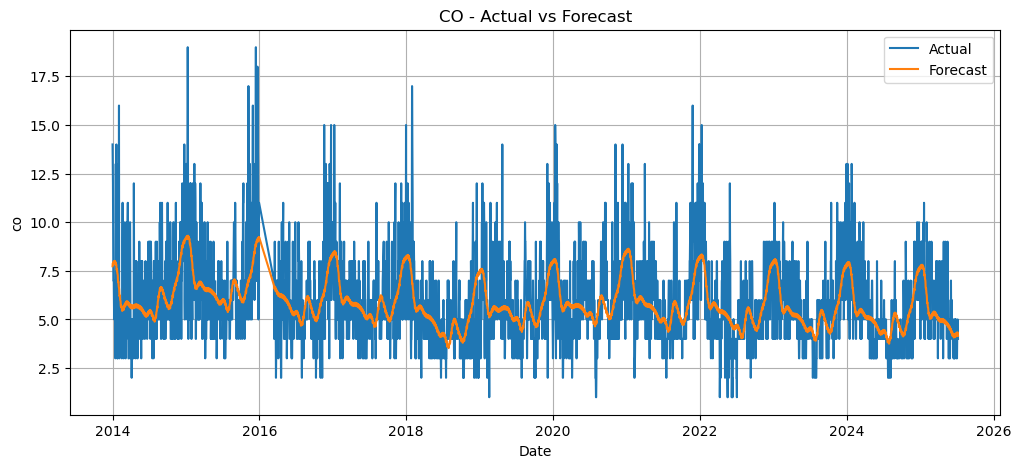

  0%|          | 0/20 [00:00<?, ?it/s]

09:38:44 - cmdstanpy - INFO - Chain [1] start processing
09:38:45 - cmdstanpy - INFO - Chain [1] done processing
09:38:45 - cmdstanpy - INFO - Chain [1] start processing
09:38:45 - cmdstanpy - INFO - Chain [1] done processing
09:38:45 - cmdstanpy - INFO - Chain [1] start processing
09:38:46 - cmdstanpy - INFO - Chain [1] done processing
09:38:46 - cmdstanpy - INFO - Chain [1] start processing
09:38:46 - cmdstanpy - INFO - Chain [1] done processing
09:38:46 - cmdstanpy - INFO - Chain [1] start processing
09:38:47 - cmdstanpy - INFO - Chain [1] done processing
09:38:47 - cmdstanpy - INFO - Chain [1] start processing
09:38:47 - cmdstanpy - INFO - Chain [1] done processing
09:38:47 - cmdstanpy - INFO - Chain [1] start processing
09:38:48 - cmdstanpy - INFO - Chain [1] done processing
09:38:48 - cmdstanpy - INFO - Chain [1] start processing
09:38:49 - cmdstanpy - INFO - Chain [1] done processing
09:38:49 - cmdstanpy - INFO - Chain [1] start processing
09:38:51 - cmdstanpy - INFO - Chain [1]

  horizon      rmse       mae      mape     smape  coverage
0  3 days  1.513860  1.229788  0.220832  0.210582  0.933051
1  4 days  1.440486  1.179149  0.225260  0.206802  0.933051
2  5 days  1.525749  1.271401  0.260747  0.230984  0.898305
3  6 days  1.637663  1.287421  0.268021  0.231770  0.862712
4  7 days  1.712859  1.366689  0.271162  0.240279  0.812712


In [5]:
city_df = load_data("aqicn_data/shanghai.csv", chunk="day")
pollutants = ['pm25', 'pm10', 'no2', 'so2', 'co']

for pollutant in pollutants:
    print(f"\n=== {pollutant.upper()} ===")
    result, test, model = train_test_prophet(city_df, pollutant)
    print(compute_metrics(result))
    plot_forecast_vs_actual(result, pollutant)
    print(prophet_crossval(model).head())